In [23]:
import sys
sys.path.insert(0,'..')

In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import glob
from scipy import stats
from Src.Utils.utils import *
from Environments.Gridworld_687 import Gridworld_687
from Src.Utils.Basis import OneHot_Basis
from Src.Algorithms.Reward.RewardFunc import RewardFunc
from Src.Algorithms.Gamma.GammaFunc import GammaFunc
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [25]:
# GW, or MC
env_type = "GW"
print("Env Type ", env_type)

Env Type  GW


In [26]:
class WeakConfig:
    def __init__(self):
        self.env = None
        self.basis = None

Gridworld
INITIALIZE REWARD FUNCTION


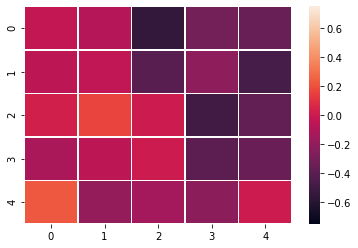

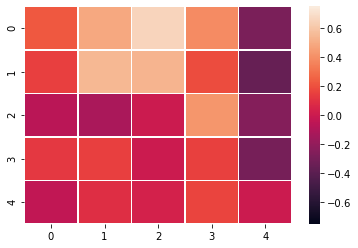

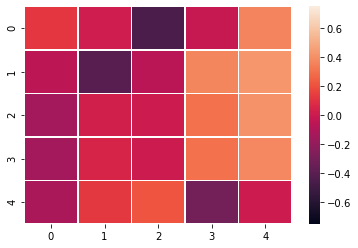

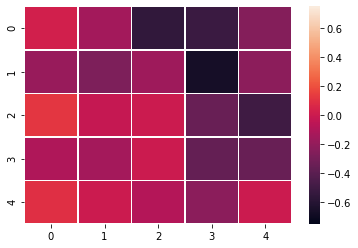

In [76]:
dir_path = "our_method/models"
aux_id = 1

# model_percentage = "0.0"
# model_percentage = "0.325"
# model_percentage = "0.65"
model_percentage = "1"

if env_type == "GW":
    print("Gridworld")    
    env = Gridworld_687()
    
    config = WeakConfig()
    config.env = env
    
    
    basis = OneHot_Basis()
    basis.init(config)
    config.basis = basis
    
    width = env.width
    
    path = f"{dir_path}/{aux_id}"
    r_path = f"{path}/Reward_Model_{model_percentage}"
    g_path = f"{path}/Gamma_Model_{model_percentage}"
    
    r_func = RewardFunc()
    r_func.init(config)
    g_func = GammaFunc()
    g_func.init(config)
    
    r_func.load_state_dict(torch.load(r_path))
    g_func.load_state_dict(torch.load(g_path))
    
#     offsets = env.action_state_offset
#     scale = 1/4
#     for key in offsets.keys():
#         offsets[key] = offsets[key].astype(float) * scale

    for a_idx in range(env.action_space.n):
        X = []
        Y = []
        R = []
        G = []
        
        for y in range(width):
            for x in range(width):
                pos = torch.tensor([[x,y]])
                onehot = basis(pos)

                a = torch.zeros(1,env.action_space.n)
                a[0,a_idx] = 1

                r = r_func(pos, onehot, action = a)
                g = g_func(onehot, action = a)
    #                 print(g)

#                 cur_offsets = offsets[a_idx]

                X.append(x)
                Y.append(y)
                R.append(r[0].detach().numpy())
                G.append(g[0].detach().numpy())
        
        
#         fig = go.Figure(data=[go.Mesh3d(x=X, y=Y, z=R, opacity=1.0, intensity=R, colorscale='Viridis')])
        actions = ["up", "right", "down", "left"]
        fig_title = f"{actions[a_idx]} at {float(model_percentage) * 100}% way complete"
        
#         plt.imshow(np.array(G).reshape(5,5), cmap='hot', interpolation='nearest')
#         plt.show()
        ax = sns.heatmap(np.array(R).reshape(5,5), linewidth=0.5, vmin=-.75, vmax=.75)
#         ax.set_title(fig_title)
        plt.show()
#         ax.figure.savefig(f"{path}/reward_outputs/{fig_title}.png")


                
            
            
            


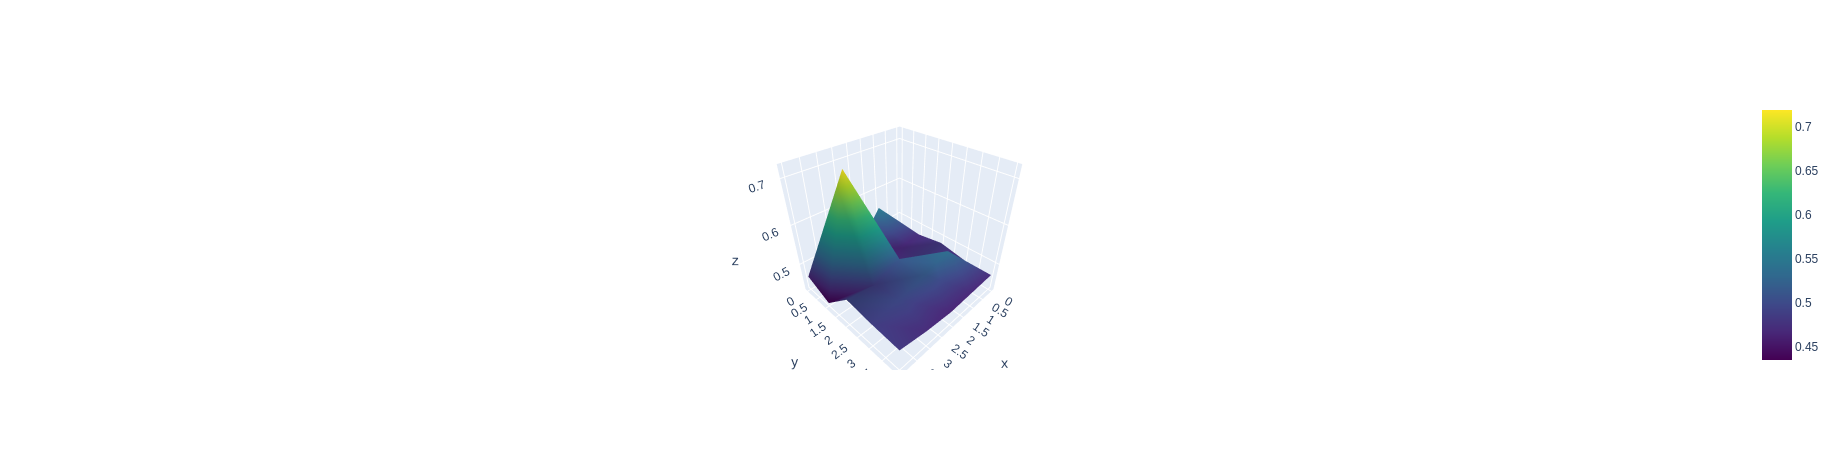

In [6]:
# fig = go.Figure(data=[go.Mesh3d(x=X, y=Y, z=R, opacity=1.0, intensity=R, colorscale='Viridis')])
fig = go.Figure(data=[go.Mesh3d(x=X, y=Y, z=G, opacity=1.0, intensity=G, colorscale='Viridis')])
# print(G)
fig.show()